# Creditworthiness of Caribbean Netherlands SMEs: measuring the financial ability and responsibility of SMEs in the Caribbean Netherlands to borrow and repay micro loans #


### Introduction ###

With this data science project, I would like to explore the idea of developing a credit risk model that is robust enough to measure and score the financial ability and responsibility of SMEs in the Caribbean Netherlands. I run and own an cloud based accounting and financial advisory firm called TACT. As an accountant and an aspiring data scientist living through the current COVID19 pandemic this topic is of high interest to me!  If successfully developed, this model can potentially be used to increase trust and lending between SME's and banks in Caribbean Netherlands region. This could play a role in providing SMEs with the financing needed meet liquidity challenges caused by the current COVID19 pandemic inaddition to making needed investments for the future. 

The economic damage caused by the COVID19 pandemic is still unravalling. A [2020 report](https://www.oecd.org/coronavirus/policy-responses/coronavirus-covid-19-sme-policy-responses-04440101/) from the Organanization for Economic Cooperation and Development (i.e. OECD) highlights the impact of the COVID19 pandemic on SMEs. This is important to consider as according to the report "SMEs account for the vast majority of companies, value added and employment" in most OECD countries. This means that the impact of COVID19 on SMEs affects the lifes of many individuals including business owners, employees, families and local communities. According to the OECD report, SMEs worldwide have seen a sharp decline in their revenue due to lower consumer spending caused by lower employment and uncertainty. In many cases SMEs have been forced to lay off staff, deal with severe liquidity challanges and are at risk of closure; not to mention all the SMEs that have been forced to close permanently. These are the results of social distancing rules being implemented by governments worldwide to limit the spread of the COVID19 virus. 

Within the Caribbean Netherlands, SME's operating on the islands of Bonaire, St. Eustatius and Saba (i.e. BES Islands) have also been impacted negatively  by the COVID19 pandemic. Due to the small scale of the islands, their trade deficit and their tourism dependent economies the problems caused by COVID19 have been exacerbated. Due to the islands having direct ties with the Netherlands, SME's on the BES Islands have received COVID19 financial support from the Dutch Central Government; similar to support offered by governments worldwide. This support has helped restaurants, hotels and other businesses keep their staff employed, cover their fixed costs and maintain a positive cashflow. However many SMEs on the BES Islands have difficulty in accessing bridge financing and loans from banks and lending institutions. Based on my experience working as an accountant on the BES Islands, I believe that this is a threefold problem. Firstly local banks see SMEs in the BES Islands as high risk. Secondly local banks lack a data driven approach to assess the credit worthiness of SMEs. Thirdly, SME's lack the expertise in presenting themselves as financially responsible borrowers. 

**Python Libraries**

Python along with the following libraries will be used to obtain, clean, transform and explore data needed for this project. Online documentation for the various libraries were accessed throughout the formulation of this project proposal. 

In [2]:
import numpy as np
import pandas as pd
import pysftp as sftp
import matplotlib.pyplot as plt
import seaborn as sns
from inforcehub import Anonymize
from scipy import stats
from sklearn.cluster import KMeans

%matplotlib inline

### DataSet Acquisition ###

**Choice of DataSet**

Two key questions in undertaking this project was in deciding firstly which data to use and how to obtain this data. For the first question, my thinking is that the transactions of an SMEs bank account(s) would be the best choice. I also considered the monthly financial statements of a business. However, many small and micro businesses within the BES Islands do not prepare monthly financial reports as a standard practise. For those that do, it would be timely and costly to ascertain the accuracy of the information provided in the form of an audit. 

By analyzing the bank transaction of a business, its actual cashflow patterns can be identified to indicate it's ability to make loan repayments. E.g. A business that deposits or credits on average $10,000 a month on it's account but only spends or credits USD7,000 has USD3,000 in free cashflow to make investements or potentially use to make loan repayments. Additionally analysis could be used to identified a business that consistently pay its employees, vendors and tax obligations on time. Such as business can be said to be both financially able and responsible.


**Limitations of Dataset**

I realize that there are limitations in only utilizing the bank transactions of a business to determine it's creditworthiness. Allot of additional context is missing such as the level of existing debt the business is carrying. It would also be important to know additional contextual information such as what industry the business operates in and its years of operations. Some of this information can be deduced by analyzing text data contained within the dataset such as transaction descriptions. However for this stage of the project, I chose to prioritize the annonymization of confidential text data contained within the dataset limiting it's usefulness for analysis. Part of the limitation is my current skills as a data scientist. As I progress with this project and grow as a data scientist, I hope to be able to better analyze the categorical text data of banking transactions while maintaining the privacy of confidential information. For this stage of the project, the analysis will focus primarily on numerical data. 

**Obtaining the DataSet - Method1**

To explore the feasbility of using bank transaction for the above analysis, I decided to use the bank transactions of my company TACT from 2019 (pre COVID19 pandemic) and 2020 (during COVID19 pandemic). The dataset was downloaded from TACT's online banking account with the Windward Island Bank as a csv file. Further description of the dataset is provided below.

In [3]:
trans = pd.read_csv('data/annon_bank_trans.csv')

**Obtaining the DataSet - Method2**

An alternative method to obtain the data required is via WIB's digital statement service. With this service, WIB provides clients with access to their bank transactions stored within csv files on their sftp server. Once a business or individual signs up for this service, they receive login credentials needed to access the sftp server. The code below has been commented out and is purely for demonstrative purposes. For security reasons, TACT's actual server login credentials have been ommited. 

In [10]:
# conn = sftp.Connection(host='sftp1.mcb-bank.com',username='username',password='password') #connect to SFTP server
# conn.chdir('DOWNLOADED') #navigate to the downloaded folder
# conn.get_d('DOWNLOADED', 'data') #download csv files within Downloaded server folder to local Data folder
# conn.close() #close connection to sftp server

**Obtaining the DataSet - Evaluation**

I decided to make use of method 1 because more transactional data for TACT could be obtained. One key drawback with method 2 is that WIB only makes bank transactions available via it's SFTP server from the date customers sign up for it's WIB Digital Statements service. TACT signed up for this service in May 2020, so transactions prior to this period are not stored on WIB's SFTP server and can only be accessed via WIB's online banking system (i.e. method 1). 

### DataSet Overview ##

**Shape of DataSet**

The original data set of contains 297 rows and 7 columns. 

In [11]:
print(trans.shape)

(297, 8)


**Features of Dataset**

Each row represents a single bank transaction and columns provides details or features about each transaction. Features include the date the transaction was posted, it's description, its transaction number and whether it was a payment received (i.e. credit) or payment made (i.e. debit) from the bank account. Here we are dealing with multiple data types include date, categorical and numeric.

In [12]:
trans.head()

,Unnamed: 0,Posted Date,Effective Date,Transaction Description,Transaction Code Description,Check Number,Debit Amount,Credit Amount
0,0,31 Dec 2020,31 Dec 2020,SYSTEM GENERATED ADMIN. CHARGE,b8721910556ff4edcb0e4edb6706d172,,9.00,0.0
1,1,31 Dec 2020,31 Dec 2020,CREDIT NOTE,df94b7a048930cb39f61b885b3b4f9cf,605041,0.00,530.0
2,2,30 Dec 2020,30 Dec 2020,C/A ATM/TB BILL PAYMENT DT,f1f009c83b019abbb3ea72ab1b728bd7,8576112,0.59,0.0
3,3,28 Dec 2020,28 Dec 2020,C/A ATM/TB TRANSFER CR,cc1f36f8edd8d54cd683e9eacb5a16e0,241151,0.00,300.0
4,4,28 Dec 2020,28 Dec 2020,C/A ATM/TB TRANSFER CR,ca3bccdf6f0f665d1fd71ff190c570a3,240928,0.00,985.0


**Data Types within Dataset**

In-order to effectively explore and work with the dataset, we must ensure that feature values consist of the corect data type. The posted date and effective date features should should consist of datetime values but currently contains string values. Similary, the check number column should consist of integer values but contains string values. These issues will be resolved in the data preparation stage.

In [13]:
trans.dtypes

Unnamed: 0                        int64
Posted Date                      object
Effective Date                   object
Transaction Description          object
Transaction Code Description     object
Check Number                     object
Debit Amount                    float64
Credit Amount                   float64
dtype: object

### Dataset Cleaning ###

**Annonymize the Dataset**

It is extremely important to consider the privacy needs of TACT and any third parties whose personal indentifiable information (PII) is contained within the dataset. In particular the Transaction Code Description column contains the names of shareholders, employees, vendors and other third parties conducting business with TacT. In-order to maintain the privacy of these parties, the following steps have ALREADY been taken to annonymize the data;

In [14]:
#anon = Anonymize() #Initialize object
#anon.transform(trans, ['Transaction Code Description'])
#trans.to_csv('data/tact-bank-trans.csv')

**Make Copy of Dataset**

In the following steps, various checks and changes will be made to the dataset. Prior to doing this, a copy of the original dataset will be made. This may come in handy for future reference.

In [15]:
origtrans = trans.copy()

**!Checking for Missing Values**

It is expected that the dataset will not contain any missing values. This is due to the fact that the dataset was downloaded from the Windward Island's Bank business banking platform. However to confirm, the following test is carried out.

In [16]:
# Function to check for missing values in columns
def check_missing_values(df, columns):
    pd.options.mode.use_inf_as_na = True
    results = {}
    try:
        for column in columns:
            booleans = list(df[column].isnull())
            if True in booleans:
                results[column] = ['missing values', len(df[column][booleans])]
            else:
                results[column] = 'no missing values'
        return results
    except ValueError as ve:
        print('Please ensure columns values contain appropriate data type')

In [17]:
print(check_missing_values(trans,trans.columns))

{'Unnamed: 0': 'no missing values', 'Posted Date': 'no missing values', 'Effective Date': 'no missing values', 'Transaction Description': 'no missing values', 'Transaction Code Description': 'no missing values', 'Check Number': 'no missing values', 'Debit Amount': 'no missing values', 'Credit Amount': 'no missing values'}


**Dealing with Zero Values**

In the above step, a function was ran to ensure that the dataset did not contain missing values. However, inorder to properly calculate statistics (i.e. mean, standard deviation) for the Debit Amount and Credit Amount columns, it is import that zero values are change to NaN (i.e. not a number) values. 

In [18]:
columns = ['Debit Amount', 'Credit Amount']
trans[columns] = trans[columns].replace({0:np.nan})

The debit and credit columns now contains 125 and 172 missing values respectively.

In [19]:
print(check_missing_values(trans, trans.columns))

{'Unnamed: 0': 'no missing values', 'Posted Date': 'no missing values', 'Effective Date': 'no missing values', 'Transaction Description': 'no missing values', 'Transaction Code Description': 'no missing values', 'Check Number': 'no missing values', 'Debit Amount': ['missing values', 125], 'Credit Amount': ['missing values', 172]}


**!Checking For Empty Strings**

Although none of the columns has missing values, it is possible that they contain empty strings (e.g. " "). This is especially important for the 5 columns of the dataset that current contains string values.

In [20]:
# Function to check for empty strings in columns
def check_empty_strings(df, columns):
    results = {}
    try:
        for column in columns:
            values = list(df[column])
            if ' ' in values:
                results[column] = ['contains empty strings', len(df[df[column] == ' '])]
            else:
                results[column] = 'no empty strings'
        return results
    except ValueError as ve:
        print('Column values passed to check_empty_strings function should contain only one element')

The check number feature contains 32 values that consist of empty strings.

In [21]:
print(check_empty_strings(trans, trans.columns))

{'Unnamed: 0': 'no empty strings', 'Posted Date': 'no empty strings', 'Effective Date': 'no empty strings', 'Transaction Description': 'no empty strings', 'Transaction Code Description': 'no empty strings', 'Check Number': ['contains empty strings', 32], 'Debit Amount': 'no empty strings', 'Credit Amount': 'no empty strings'}


**Dealing with Empty Strings**

In [22]:
column = ['Check Number']
trans[column] = trans[column].replace({' ':0})

The check number column now has no empty strings.

In [23]:
print(check_empty_strings(trans, trans.columns))

{'Unnamed: 0': 'no empty strings', 'Posted Date': 'no empty strings', 'Effective Date': 'no empty strings', 'Transaction Description': 'no empty strings', 'Transaction Code Description': 'no empty strings', 'Check Number': 'no empty strings', 'Debit Amount': 'no empty strings', 'Credit Amount': 'no empty strings'}


**Checking for Duplicate Values**

We would expect that each transaction within the dataset is unique and that there aren't any duplicates. A simple check is completed below to confirm this.

In [24]:
duplicateBooleans = list(origtrans.duplicated())
print('There are duplicate values in the dataset: ', True in duplicateBooleans)

There are duplicate values in the dataset:  False


**Converting Columns to Approriate Data Types**

Below we convert the effective date and posted date columns to datetime values. This will make it possible to do timeseries analysis on the dataset.

In [25]:
trans['Effective Date'] = pd.to_datetime(trans['Effective Date'], format='%d %b %Y')
trans['Posted Date'] = pd.to_datetime(trans['Posted Date'], format='%d %b %Y')

We then convert the check number column to numeric values.

In [26]:
trans['Check Number'] = trans['Check Number'].astype(int)

Below we see that columns are now in the appropriate data type.

In [27]:
trans.dtypes

Unnamed: 0                               int64
Posted Date                     datetime64[ns]
Effective Date                  datetime64[ns]
Transaction Description                 object
Transaction Code Description            object
Check Number                             int64
Debit Amount                           float64
Credit Amount                          float64
dtype: object

**Drop Unwanted Columns**

The Unnamed:0 column is a duplicate of the dataframe's rows index numbers. As such it will be dropped.

In [28]:
trans.drop(columns=['Unnamed: 0'], inplace=True)

**Rename Columns for Easier Use**

Now that the columns data types have been set, I would like to rename the columns for better clarity and use.

In [29]:
columnsDict = {'Posted Date': 'postdate', 'Effective Date': 'effectivedate', 
               'Transaction Description': 'type', 'Transaction Code Description': 'description',
               'Check Number': 'number', 'Debit Amount': 'debitvalue', 'Credit Amount': 'creditvalue'}

trans.rename(columns=columnsDict, inplace=True)


### DataSet Transformation ###

In-order to obtain data that is more useful for exploratory analysis, I would like to create a new dataset from the existing one. This new dataset will summarize transactions per day. For each unique date **(i.e. postdate)**, I would like to identify the unique transaction types **(i.e. uniquetype)**, the number of unique transaction types **(i.e. numuniquetype)**, the number of debits **(i.e. numdebits)**, the number of credits **(i.e. numcredits)**, the total value of debits **(i.e. sumdebits)** and the total value of credits **(i.e. sumcredits)**. The difference between the total value of debits and credits per day will be calculated **(i.e. sumdiff)**. A check will then made to determine if a loan repayment is possible **(i.e. repayposs)** for each day. 1 indicates that repayment is possible (i.e. diffsum value is positive) and 0 indicates that repayment is not possible (i.e. diffsum value is positive). 

**Copy Cleaned Dataset**

Before the new dataset is created a copy of the existing cleaned dataset will be retained for future reference and analysis.

In [30]:
cleantrans = trans.copy()

**Generate New Dataset Values**

In [31]:
postdate = trans['postdate'].unique()
uniquetypes = trans.groupby('postdate')['type'].unique()
numuniquetypes = uniquetypes.apply(len)
numdebits = trans.groupby('postdate')['debitvalue'].count()
numcredits = trans.groupby('postdate')['creditvalue'].count()
sumdebits = trans.groupby('postdate')['debitvalue'].sum() 
sumcredits = trans.groupby('postdate')['creditvalue'].sum() 
sumdiff = sumcredits - sumdebits
repayposs = (sumcredits > sumdebits).replace({False:0, True:1}) #Convert from boolean to numerical data type

**Introduce Scoring Value**

I would also like to introduce a repayment scoring value to the dataset. This will be calculated using values in the sumdiff column and the following function;

In [32]:
def repayscore(sumdiff):
    score = 0
    if sumdiff <= 0:
        return score
    elif sumdiff > 0 and sumdiff <= 100:
        score = 1
        return score
    elif sumdiff > 100 and sumdiff <= 500:
        score = 2
        return score
    elif sumdiff > 500 and sumdiff <= 750:
        score = 3
        return score
    elif sumdiff > 750 and sumdiff <= 1000:
        score = 4
        return score
    else:
        score = 5
        return score

**Create Summarized DataSet**

The columns to be included in the summarized datset include;
<br>*postdate, uniquetype, numuniquetype, numdebits, numcredits, sumdebits, sumcredits, sumdiff, repayposs*

In [33]:
sumdict = { 'uniquetypes' : uniquetypes,'numuniquetypes' : numuniquetypes,
            'numdebits' : numdebits, 'numcredits' : numcredits, 'sumdebits' : sumdebits,
            'sumcredits' : sumcredits, 'sumdiff' : sumdiff, 'repayposs' : repayposs}

In [34]:
sumtrans = pd.DataFrame(data=sumdict)

In [35]:
sumtrans['repayscore'] = sumtrans['sumdiff'].apply(repayscore)

**Handle Zero Values in Sum Columns**

Inorder to remove the effect of zero values in calculating statistics (e.g. mean) for all numerical columns except numuniquetypes, repayposs and repayscore.

In [36]:
columns = ['numdebits','numcredits','sumdebits', 'sumcredits', 'sumdiff']
sumtrans[columns] = sumtrans[columns].replace({0:np.nan})

**Check for Missing Values**

As expected the numdebits, numcredits, sumdebits, sumcredits and summdiff columns contain NaN values.

In [37]:
print(check_missing_values(sumtrans, sumtrans.columns))

{'uniquetypes': 'no missing values', 'numuniquetypes': 'no missing values', 'numdebits': ['missing values', 45], 'numcredits': ['missing values', 50], 'sumdebits': ['missing values', 45], 'sumcredits': ['missing values', 50], 'sumdiff': ['missing values', 2], 'repayposs': 'no missing values', 'repayscore': 'no missing values'}


### DataSet Exploration ###

Now that our data has been cleaned and transformed, it is ready for exploratory analysis. Even though the transformed dataset has fewer rows of data, it has richer features that can potentially help us draw useful insights. Beyond this, I would like to determine whether a larger dataset with the same features can be combined with machine learning techniques to build a model that can be used to determine the ability of SMEs to responsibly take on loans and meet repayment obligations. 

**Key Descriptive Statistics**

Let's begin by generating some key measures of location statistics. The below summary table shows that TACT had transactions on 134 days during 2020. This is just over one third (i.e. 37%) out of a possible 365 transaction days in a year. From the 134 days, on 89 days there were debits transactions and on 84 days there were credit transactions. The average of summed debit and credit transactions are US1,560 and US2,082. The standard deviations for both summed debit and credit transactions are quite large and warrant further analysis. In terms of repayment possibilities and scores TACT's performance looks promising. Based on the quartile percentages, on only 25% or 34 days out of the 134 days, TACT would not be able to make loan repayments as its outgoing payments (debits) exceeded it's incoming payments (credits). On 50% or 68 days out of the 134 days, TACT would be able to make a payment of US75 or less. 

In [38]:
sumtrans.describe()

,numuniquetypes,numdebits,numcredits,sumdebits,sumcredits,sumdiff,repayposs,repayscore
count,134.000000,89.000000,84.000000,89.000000,84.000000,132.000000,134.000000,134.000000
mean,1.544776,1.932584,1.488095,1560.905955,2082.410476,272.741288,0.529851,2.000000
std,0.800523,1.194664,0.768256,2386.506810,2320.425620,2684.883294,0.500981,2.190204
min,1.000000,1.000000,1.000000,0.590000,50.000000,-10780.370000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,30.000000,506.250000,-433.890000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,573.600000,1454.000000,75.500000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,1918.000000,2565.687500,1449.597500,1.000000,5.000000
max,5.000000,7.000000,4.000000,10780.370000,13510.000000,11810.000000,1.000000,5.000000


**Plot Distribution Function**

A function is defined below to show the distribution of a range of values.

In [39]:
def plot_distribution(x):
    plt.hist(x)
    plt.axvline(np.nanmean(x), color='k', linestyle='dashed', label = 'Mean',linewidth=1)
    plt.axvline(np.nanmedian(x), color='r', linestyle='dashed', label = 'Median',linewidth=1)
    std_dev = np.nanstd(x)
    plt.axvline(np.nanmean(x)+std_dev, color='b', linestyle='dashed', label = 'Mean +/- STD',linewidth=1)
    plt.axvline(np.nanmean(x)-std_dev, color='b', linestyle='dashed', linewidth=1)
    plt.ylabel('Counts')
    plt.xlabel(x.name)
    plt.legend(loc='best')
    return plt.show()


**Distribution of Summed Debits & Credits**

Below we can see that the summed debits does not follow a normal distribution. Instead the distribution is skewed with a long right tail. This means that even though 50% of summed debits are US573 or less, the average is being increased due to larger values. Similarly summed credits values also display a skewed right tailed distribution. However, the average of the summed credit values is closer to it's middle or median value compared to the summed debit values. It is important to remember that the data currently being analyzed is for 1 single company. In the second stage of this project transactions from other companies will also be included and analyzed. 

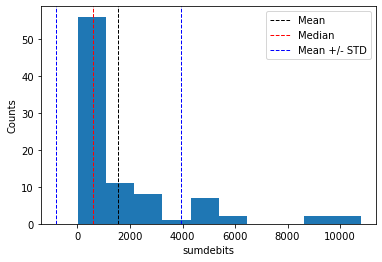

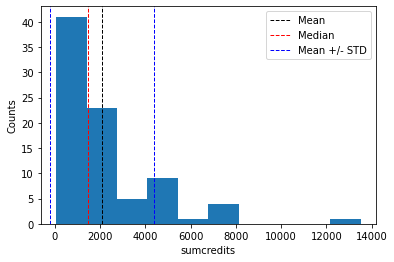

In [40]:
plot_distribution(sumtrans['sumdebits'])
plot_distribution(sumtrans['sumcredits'])

**Distribution of Number of Debits and Credits**

The histrograms below show that both the number of debits per day and number of credits per day values approximate a skewed distribution with a long right tail. For the number of debits values, the mean and the median are almost the same. For the number of credit values, there is a larger difference between the mean and the median.

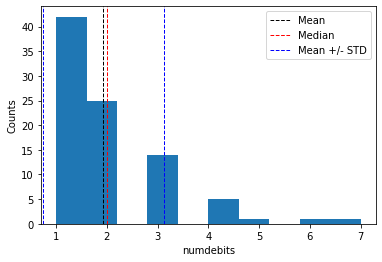

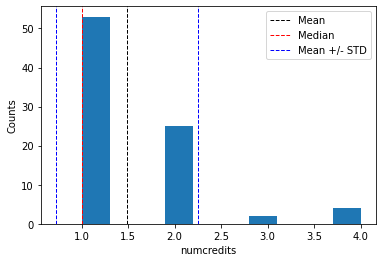

In [41]:
plot_distribution(sumtrans['numdebits'])
plot_distribution(sumtrans['numcredits'])

**Distribution of Summed Differences**

As expected, the summed difference values approximate the shape of a normal distribution. 

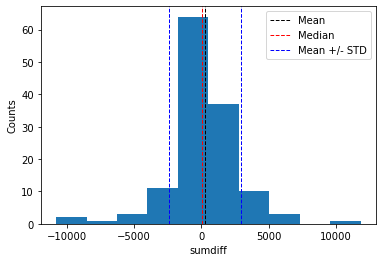

In [42]:
plot_distribution(sumtrans['sumdiff'])

**Calculation of Trimmed Mean**

Earlier we saw that the averages or means of the summed debits and credit transactions were being increased due to large outlier values. This is confirmed below by calculating the trimmed means for both sets of values.

In [43]:
sumdebitnumbers = [x for x in sumtrans['sumdebits'].replace({np.nan:0}) if x != 0]
sumcreditnumbers = [x for x in sumtrans['sumcredits'].replace({np.nan:0}) if x != 0]

print('The mean of summed debits is', np.nanmean(sumtrans['sumdebits']))
print('The trimmed mean of summed debits is',stats.trim_mean(sumdebitnumbers, 0.1))
print('\n')
print('The mean of summed credits is', np.nanmean(sumtrans['sumcredits']))
print('The trimmed mean of summed credits is',stats.trim_mean(sumcreditnumbers, 0.1))

The mean of summed debits is 1560.90595505618
The trimmed mean of summed debits is 1066.5623287671233


The mean of summed credits is 2082.410476190476
The trimmed mean of summed credits is 1683.6100000000001


**Identifying Correlation Between Values**

In addition to understanding the distribution of values contained within the dataset, I would also like to check if there is any correlation between these values. Looking forward to the next step in this project, I'm interested in whether the numuniquetypes, numdebits, numcredits and repayposs columns (i.e. predictors variables) can be used to predict values in the repayscore column (i.e. outcome variables). Clearly correlation does not equal causation, however a good degree of correlation between the key variable might indicate application of a linear regression machine learning modeling could be feasible. 

In [44]:
sumtrans.corr()

,numuniquetypes,numdebits,numcredits,sumdebits,sumcredits,sumdiff,repayposs,repayscore
numuniquetypes,1.000000,0.163358,0.617100,0.247482,0.351529,0.126803,0.174747,0.222994
numdebits,0.163358,1.000000,0.016555,0.633110,0.125810,-0.466109,-0.150737,-0.119482
numcredits,0.617100,0.016555,1.000000,0.074280,0.461777,0.310107,0.057982,0.257525
sumdebits,0.247482,0.633110,0.074280,1.000000,0.394179,-0.627368,-0.148147,-0.107756
sumcredits,0.351529,0.125810,0.461777,0.394179,1.000000,0.659764,0.086936,0.448111
sumdiff,0.126803,-0.466109,0.310107,-0.627368,0.659764,1.000000,0.614828,0.700306
repayposs,0.174747,-0.150737,0.057982,-0.148147,0.086936,0.614828,1.000000,0.863402
repayscore,0.222994,-0.119482,0.257525,-0.107756,0.448111,0.700306,0.863402,1.000000


The below correlation matrix shows that there is a strong positive correlation (i.e. 0.86) between repayment possibility and repayment score values. However aside from that, there is actually weak positive correlation between the repayment possibility score values and the previously identified predictor values. This is making me question my thinking on how to create a machine learning model in the next stage of this project. Perhaphs a better approach might be to classify the summed difference values into clusters using a k-means algorithm and determine their repayscore depending on which cluster they are closest to. We can then analyze the common features of summed transactions in each cluster. This is essentially the opposite of my current approach of arbitrarily imposing my own scoring value on the dataset. With that said it may be still worth while to perform multi regression analysis using the previously identified predictor values to determine the repayment ability score value.

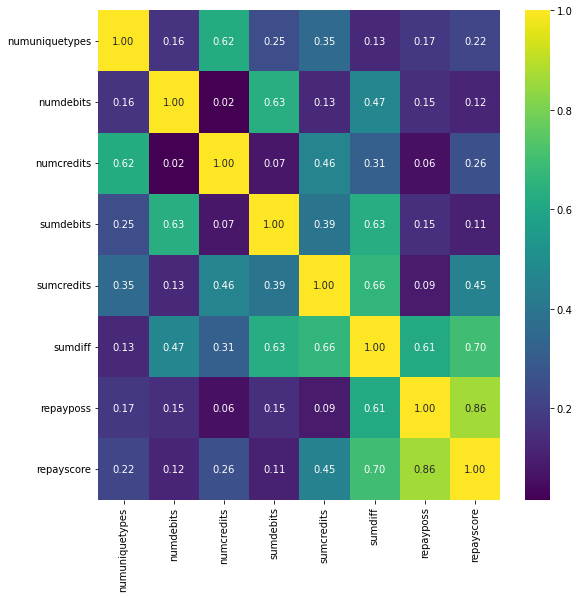

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(sumtrans.corr()), annot=True, cmap="viridis", fmt="0.2f");

**Standardize Dataset Values**


In the next stage of this project, my aim is to apply machine learning algorithms (e.g. K-means clustering, multiple linear regression) to a larger dataset in-order to build a repayment score categorization model. In anticipation of this, I would need to standardize the values contained with the dataset. This is particulary important for dealing with and comparing data variables that use difference measurements of scale. 

In [46]:
def standardize(values):
    """Returns a copy of array with standardized values"""
    try:
        mean = np.nanmean(values)
        std = np.nanstd(values)
        centreValues = values.apply(lambda v: (v-mean)/std)
        return centreValues
    except ValueError as ve:
        print('Column values passed to standardize function should contain only one element')

In [47]:
standtrans = sumtrans.copy()

In [48]:
for col in standtrans.columns[1:]:
    standtrans[col] = standardize(standtrans[col])

In [49]:
standtrans.head()

,uniquetypes,numuniquetypes,numdebits,numcredits,sumdebits,sumcredits,sumdiff,repayposs,repayscore
postdate,,,,,,,,,
2020-01-02,[DEBIT NOTE],-0.683079,0.056750,NaN,-0.416047,NaN,-0.316425,-1.061595,-0.916584
2020-01-03,"[DEBIT NOTE, C/A ATM/TB TRANSFER CR]",0.570792,0.898549,-0.639144,-0.558058,-0.657864,0.020809,0.941979,0.000000
2020-01-06,[CUSTOMER DEPOSIT],-0.683079,NaN,-0.639144,NaN,0.089999,0.754202,0.941979,1.374875
2020-01-07,"[CREDIT NOTE, CUSTOMER DEPOSIT]",0.570792,NaN,0.670322,NaN,0.198385,0.847670,0.941979,1.374875
2020-01-09,[C/A ATM/TB BILL PAYMENT DT],-0.683079,-0.785048,NaN,-0.236364,NaN,-0.475846,-1.061595,-0.916584


### Conclusion and Further Work ###

**Summary**
<br>With this project proposal, I began to explore the idea of developing a credit risk model that is robust enough to measure and score the financial ability and responsibility of SMEs in the Caribbean Netherlands. If successfully developed, this model could potentially be used to make it easier for SMEs in the Caribbean Netherlands to obtain business loans and financing. For this project proposal, I used bank transactions data from my own business TacT. The data was annonymized, cleaned and transformed before performing exploratory analysis. The initial analysis of the dataset perhaphs raised more questions than it answered for me. Below I highlight some the future work and research needed as this project continues;

**Further Research Required**
<br>1. During the data transformation step, I created an abitrary repayment ability score from 1 - 5. The greater the difference of cash remaining from transactions on a particular day (i.e. summed credits minus debits), the higher the score given. However, further data and research is needed to identify what constitues "good" vs "bad"  repayment ability and what scoring scale would be most appropriate to use for SMEs in the Caribbean Netherlands. Further research might involve finding out what criteria banks and lending institutions in the Caribbean Netherlands currently use the determine the creditworthiness of SMEs.
<br>
<br>2. In the next stage of this project I would like to attempt building a machine learning model that can best identify and score the repayment ability of SMEs. Two machine learning techniques that I think would be appropriate are K-means clustering and multiple linear regression analysis. Further research is needed to identify the suitability of these two algorithms for the task at hand.
<br>
<br>3. Finally, I would also like to research external data sources that can be accessed and used to provide more contextual information about a SME and its financial transactions. This will be driven primarily by the above two research questions. This may also allow for a more fairer view of a SME's financial performance. I'm particularly thinking about businesses that perform many of their financial transactions using cash.

**Further Work Required**
<br>1. One key area of improvement is to obtain a larger dataset with transactions from several companies. I will need to carefully consider how to legally acquire and handle this data in accordance with privacy laws and ethical best practises. A larger dataset would allow for building a better credit scoring model that encompasses a wider range of SME's financial transactions. This will ensure that the data I work with and any subsequent model built is not biased. 
<br>
<br>2. Looking forward, I would also like to make use of the text and datetime data values within the dataset. For example categorical text values in the uniquetypes column could be converted into numerical values. This will make it easier to use this data as an independent input variable using multiple linear regression analysis for example.
<br>


### Resources ###

The following resources were accessed during the preparation of this project proposal;
<br>
<br>Brock, T (2021, 8 April), Credit Scoring. Available at: https://www.investopedia.com/terms/c/credit_scoring.asp Accessed 13th June 2021
<br>
<br>Bruce, Bruce and Gedeck (2020). Practical Statistics for Data Scientists 2nd edition. Boston: O'Reilly
<br>
<br>Summerfield, M (2010). Programming in Python 3: A Complete Introduction to the Python Language 2nd edition. Addison-Welsey
<br>
<br>McKinney, W. (2017). Python for Data Analysis 2nd edition. Boston: O'Reilly
<br>
<br>OECD, (2020, 15th July), Coronavirus (COVID-19): SME policy responses. Available at: https://www.oecd.org/coronavirus/policy-responses/coronavirus-covid-19-sme-policy-responses-04440101/ Accessed 3rd June 2021
<br>
<br>Sweet, K, (2017, 22 April), Major Changes Coming To How Your Credit Score Is Calculated. Available at: https://www.usatoday.com/story/money/personalfinance/2017/04/22/major-changes-coming-how-your-credit-score-calculated/100653342/ Accessed 5th June 2021
